### Pacotes

Iniciamos o projeto carregando os pacotes necessários:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, ConfusionMatrixDisplay

### Base de dados

Para continuar com o projeto, utilizamos a função _read_csv()_ do pandas para importar as bases de dados de treino e de teste:

In [2]:
df_train = pd.read_csv('classification_train.csv')
df_test = pd.read_csv('classification_test.csv')

Após a importação, prosseguimos com a visualização e entendimento da base de dados:

In [3]:
df_train.head(10)

,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1
5,1.383894,-0.229171,1
6,0.330585,0.014517,1
7,1.056232,1.110681,0
8,0.601328,0.734158,0
9,-0.826317,0.601454,0


In [4]:
df_train.shape

(670, 3)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      670 non-null    float64
 1   x2      670 non-null    float64
 2   target  670 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.8 KB


Conforme exibido acima, podemos ver que a base de dados é composta por 3 colunas numéricas -- $x1$, $x2$ e $target$ -- e por 670 observações contendo valores não nulos (NaN). Seguimos com o processo verificando se a variável $target$ não se trata de uma variável binária desbalanceada:

In [6]:
df_train['target'].value_counts()

1    339
0    331
Name: target, dtype: int64

Conforme exibido acima, há uma diferença de 8 observações entre as classes $0$ e $1$, uma diferença pequena que não caracteriza em desbalanço.

### Visualização dos dados

Iniciamos a vizualização dos dados, exibindo as variáveis independentes ($x1$ e $x2$) para verificar se há alguma correlação entre elas:

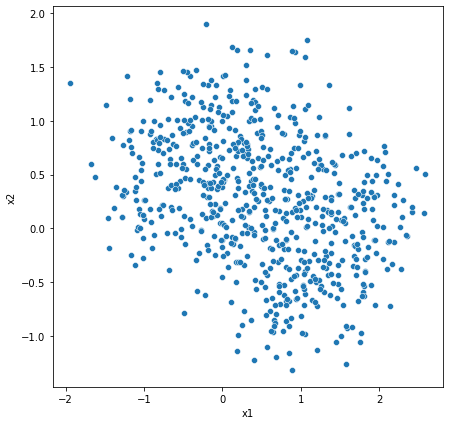

In [7]:
fig = plt.figure(figsize=(7,7))
ax = sns.scatterplot(x='x1', y='x2', data=df_train);

O gráfico acima não aponta para a existência de correlação entre as variáveis independentes, com isso, seguimos com a análise gráfica para verificar se há uma separação definida entre as classes da variável dependente ($target$):

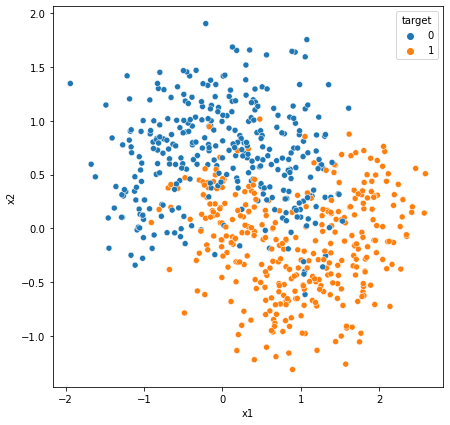

In [8]:
fig = plt.figure(figsize=(7,7))
ax = sns.scatterplot(x='x1', y='x2', hue='target', data=df_train);

A seguir, exibimos a relação entre as variáveis independentes e a variável dependente:

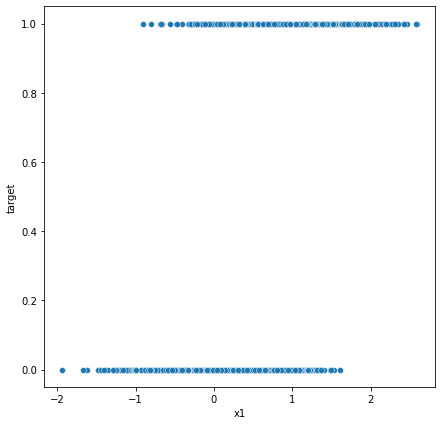

In [9]:
fig = plt.figure(figsize=(7,7))
ax = sns.scatterplot(x='x1', y='target', data=df_train);

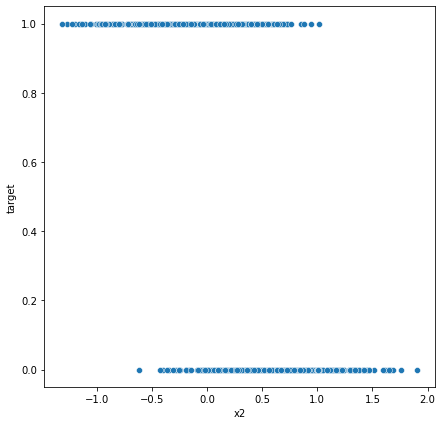

In [10]:
fig = plt.figure(figsize=(7,7))
ax = sns.scatterplot(x='x2', y='target', data=df_train);

Pelos gráficos acima, podemos verificar as relações entre a variável _target_, _x1_ e _x2_ onde maiores valores de _x1_ apontam para a classe 1 enquanto maiores valores de _x2_ apontam para a classe 0 da variável alvo.

Também é importante verificar a presença de outliers nos dados, pois os mesmos podem impactar significativamente os resultados, com isso, prosseguiremos nossa análise analisando estes pontos.

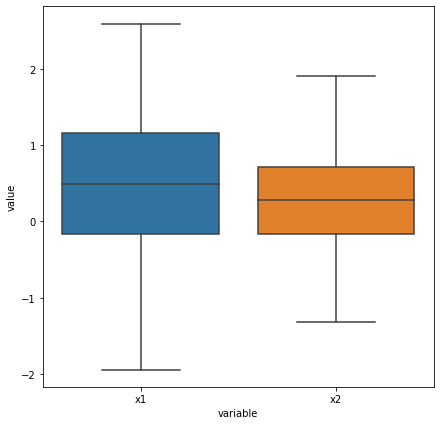

In [11]:
fig = plt.figure(figsize=(7,7))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_train.iloc[:,:2]))

Como pode ser visto no gráfico acima, não há pontos abaixo do 25º percentil ou acima do 75º percentil para ambas as variáveis, apontando assim para a ausência de outliers. Como não há outliers, podemos seguir para a modelagem.

### Modelagem

Começamos a etapa de modelagem definindo as variáveis independentes e dependentes, tanto para treinamento quanto para teste:

In [12]:
X_train = df_train.iloc[:,:2].values
y_train = df_train.iloc[:, -1].values

In [13]:
X_test = df_test.iloc[:,:2].values
y_test = df_test.iloc[:, -1].values

Com as variáveis definidas, iremos gerar e aplicar 4 modelos, sendo eles: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Random Forest e Logistic Regression.

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)

In [15]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
predict_svm = svm.predict(X_test)

In [16]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
predict_rf = rf.predict(X_test)

In [17]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)

Após gerar os resultados com os modelos padrão, iremos executar um tunelamento de hiperparâmetro para cada modelo e aplicá-los novamente, para checar se haverá melhora nos scores:

In [18]:
params = [
    {
        'n_neighbors': [1,2,3,4,5],
        'weights': ['uniform', 'distance']
    }
]
opt_params = GridSearchCV(
    KNeighborsClassifier(),
    params,
    cv=10,
    scoring='f1',
    n_jobs=-1
)
opt_params.fit(X_train, y_train)
opt_params.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [19]:
knn_opt = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_opt.fit(X_train, y_train)
predict_knn_opt = knn_opt.predict(X_test)

In [20]:
params = [
    {
        'C': [0.5, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    }
]
opt_params = GridSearchCV(
    SVC(),
    params,
    cv=10,
    scoring='f1',
    n_jobs=-1
)
opt_params.fit(X_train, y_train)
opt_params.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [21]:
svm_opt = SVC(C=100, gamma=1, random_state=42)
svm_opt.fit(X_train, y_train)
predict_svm_opt = svm_opt.predict(X_test)

In [22]:
params = [
    {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [10, 50, 100, 150]
    }
]
opt_params = GridSearchCV(
    RandomForestClassifier(),
    params,
    cv=10,
    scoring='f1',
    n_jobs=-1
)
opt_params.fit(X_train, y_train)
opt_params.best_params_

{'max_depth': 150, 'n_estimators': 100}

In [23]:
rf_opt = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
rf_opt.fit(X_train, y_train)
predict_rf_opt = rf_opt.predict(X_test)

In [24]:
params = [
    {
         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'penalty': ['l2'],
        'C': [10, 1, 0.1, 0.01]
    }
]
opt_params = GridSearchCV(
    LogisticRegression(),
    params,
    cv=10,
    scoring='f1',
    n_jobs=-1
)
opt_params.fit(X_train, y_train)
opt_params.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [25]:
lr_opt = LogisticRegression(C=1, penalty='l2', solver='newton-cg')
lr_opt.fit(X_train, y_train)
predict_lr_opt = lr_opt.predict(X_test)

In [26]:
pred = [['KNN', predict_knn], 
        ['SVM', predict_svm], 
        ['Random Forest', predict_rf], 
        ['Logistic Regression', predict_lr]]

for model, result in pred:
    precision = precision_score(y_test, result)
    recall = recall_score(y_test, result)
    f1 = f1_score(y_test, result)
    print(model + '\n'
          'Precision score: ' + str(round(precision,2)) +'\n'
          'Recall score: ' + str(round(recall,2)) + '\n'
          'F1 Score: ' + str(round(f1,2))+ '\n')

KNN
Precision score: 0.87
Recall score: 0.88
F1 Score: 0.87

SVM
Precision score: 0.86
Recall score: 0.89
F1 Score: 0.88

Random Forest
Precision score: 0.85
Recall score: 0.87
F1 Score: 0.86

Logistic Regression
Precision score: 0.82
Recall score: 0.85
F1 Score: 0.83



In [27]:
pred = [['KNN (optimized)', predict_knn_opt], 
        ['SVM (optimized)', predict_svm_opt], 
        ['Random Forest (optimized)', predict_rf_opt], 
        ['Logistic Regression (optimized)', predict_lr_opt]]

for model, result in pred:
    precision = precision_score(y_test, result)
    recall = recall_score(y_test, result)
    f1 = f1_score(y_test, result)
    print(model + '\n'
          'Precision score: ' + str(round(precision,2)) +'\n'
          'Recall score: ' + str(round(recall,2)) + '\n'
          'F1 Score: ' + str(round(f1,2))+ '\n')

KNN (optimized)
Precision score: 0.87
Recall score: 0.88
F1 Score: 0.87

SVM (optimized)
Precision score: 0.85
Recall score: 0.89
F1 Score: 0.87

Random Forest (optimized)
Precision score: 0.87
Recall score: 0.88
F1 Score: 0.87

Logistic Regression (optimized)
Precision score: 0.82
Recall score: 0.85
F1 Score: 0.83



Dados os resultados obtidos acima, podemos afirmar que, no geral, a otimização dos modelos não resultou em melhoras significantes. Podemos ver também que os modelos KNN e Random Forest obtiveram os melhores scores para a classificação dos dados fornecidos.

Dado os resultados demonstrados, decidimos prosseguir com o modelo Random Forest otimizado para analisar a importância de cada variável na previsão do modelo:

In [28]:
for importance, name in sorted(zip(rf_opt.feature_importances_, df_train.columns[:2]),reverse=True):
    print(name, importance)

x2 0.5664422820569951
x1 0.43355771794300485


Conforme exibido acima, o resultado aponta para uma maior impacto exercido pela variável _x2_ quando comparado com o impacto causado pela variável _x1_, mostrando assim que a variável _target_ sofre maior influência da primeira.